<a href="https://colab.research.google.com/github/dstrick97/cse380-notebooks/blob/master/10_2_Ponder_and_Prove_Spanning_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ponder and Prove Spanning Trees
## Due: Saturday, 13 March 2021, 11:59 pm

## The Goal

The goal of this assignment is to investigate spanning trees of graphs.

Here is the example spanning tree you saw in your DPC:

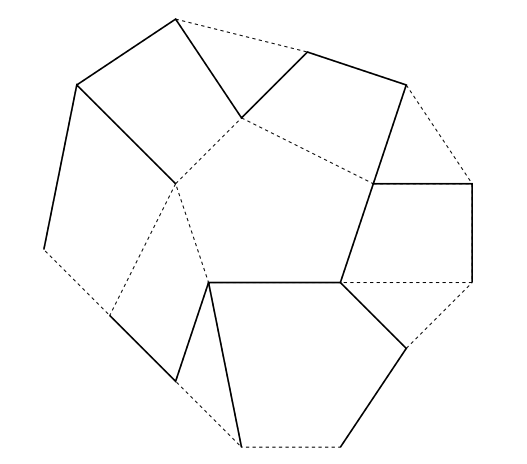

Wikipedia has a [Spanning Tree](https://en.wikipedia.org/wiki/Spanning_tree) page with useful information.

In [76]:
class GraphNode():
  def __init__(self, value = 0, links = []):
    self.value = value
    self.links = links

  def is_link(self, neighbor_value):
    if neighbor_value in links:
      return True
    return False

  def add_link(self, neighbor_value):
    if not neighbor_value in self.links:
      self.links.append(neighbor_value)

  def remove_link(self, neighbor_value):
    link.remove(neighbor_value)

  def __eq__(self, node):
    return self.value == node.value and set(self.links) == set(node.links)


In [106]:
class Graph():
  def __init__(self, nodes = [], links = []):
    self.nodes = []
    for node in nodes:
      adjacent_nodes = [link[1] for link in links if link[0] == node] + [link[0] for link in links if link[1] == node]
      self.nodes.append(GraphNode(node, adjacent_nodes))

  def get_node(self, node_value):
    return next(graphNode for graphNode in self.nodes if graphNode.value == node_value)

  def get_nodes(self):
    return [node.value for node in self.nodes]

  def get_links(self):
    links = [str(adj_list[0]) + str(adjacent_node) for adj_list in self.get_adjacency_list() for adjacent_node in adj_list[1]]
    return list(set(tuple(sorted(link)) for link in links))


  def get_adjacent_nodes(self, node_value):
    node = self.get_node(node_value)
    return node.links

  def get_adjacency_list(self):
    return [(graphNode.value, graphNode.links) for graphNode in self.nodes]

  def is_adjacent(self, node_from, node_to):
    self.add_node(node_from)
    node = self.get_node(node_from)
    return node.is_link(node_to)

  def add_node(self, node_value, links = []):
        if not node_value in self.get_nodes():
            self.nodes.append(GraphNode(node_value, links))


  def add_link(self, node_from, node_to):
    self.add_node(node_from)
    node = self.get_node(node_from)
    if not node.is_link(node_to):
      node.add_link(node_to)
    self.add_node(node_to)
    node = self.get_node(node_to)
    if not node.is_link(node_from):
      node.add_link(node_from)


In [112]:
nodes = [1, 2, 3, 4, 5]
links = [(1,2), (2,4), (3,5), (1,4)]
graph = Graph(nodes, links)
graph.add_link(1, 3)
print("Nodes:",graph.get_nodes())
print("Links:",graph.get_links())
print("Nodes adjacent to Node", nodes[0], ':', graph.get_adjacent_nodes(nodes[0]))
print("List of nodes and adjacent nodes:",graph.get_adjacency_list())


Nodes: [1, 2, 3, 4, 5]
Links: [('1', '2'), ('2', '4'), ('1', '4'), ('3', '5'), ('1', '3')]
Nodes adjacent to Node 1 : [2, 4, 3]
List of nodes and adjacent nodes: [(1, [2, 4, 3]), (2, [4, 1]), (3, [5, 1]), (4, [2, 1]), (5, [3])]


## Algorithm to Find a Spanning Tree

In five pseudocode steps:
1. Start with the "frontier" being a list of size one --- containing just the first node.
2. Pick a link connected to a node in the frontier that does not create a cycle --- that is, the other (destination) node of the link is not already in the frontier.
3. Add that destination node to the frontier unless already there.
4. Add the picked link to the spanning-tree.
5. Repeat steps 2-4 until all nodes are in the frontier.

In [108]:
import random

def find_spanning_tree(graph):
  # Start with the "frontier" being a list of size one --- containing just the first node.
  frontier = [graph.get_nodes()[0]]
  #print(frontier)
  tree = Graph(graph.get_nodes(), [])

  # Pick a link connected to a node in the frontier that does not create a cycle --- that is, the other (destination) node of the link is not already in the frontier.
  while len(frontier) < len(graph.get_nodes()):
    node = frontier[random.randint(0, len(frontier) - 1)]

    if not set(frontier).issuperset(graph.get_adjacent_nodes(node)[1]):
      available_nodes = list(set(frontier).symmetric_difference(graph.get_adjacent_nodes(node)[1]) - set(frontier))
      dest_node = available_nodes[random.randint(0, len(available_nodes) - 1)]

      # Add that destination node to the frontier unless already there.
      frontier.append(dest_node)

      # Add the picked link to the spanning-tree.
      tree.add_link(node, dest_node)

  return tree


## What to Create

1. A graph representation --- a way to represent both nodes and links.
2. A function that takes a graph and returns a list of its nodes.
3. A function that takes a graph and returns a list of its links.
4. A function that takes a graph and returns an adjacency list of nodes and links.
5. A function that takes a graph and a node and returns a list of adjacent nodes to that node.

Everything is implemented above.

## Test Your Code

You will need several different types of graphs (including ladder graphs) with which to test your algorithm.


See the self-assessment for specifics.

In [109]:
import graphviz

#learned from https://pypi.org/project/pygraphviz/
# and https://graphviz.org/

def display_graph(graph, engine = 'fdp'):
  graphic = graphviz.Graph(format='png')
  # graphic.edges([str(adj_list[0]) + str(adjacent_node) for adj_list in graph.get_adjacency_list() for adjacent_node in adj_list[1]])
  graphic.edges([str(link[0]) + str(link[1]) for link in graph.get_links()])
  graphic.engine = engine
  return graphic



In [110]:
def generate_ladder_graph(n):
  nodes = [chr(i+97) for i in range(n * 2)]
  links = []
  for i in range(n):
    if (i != 0):
      # The vertical bar links
      links.append((chr((i*2) - 1 + 96), chr((i*2) + 1 + 96)))
      links.append((chr((i*2) + 96), chr((i*2) + 2 + 96)))
    # The horizontal bar link
    links.append((chr((i*2) + 1 + 96), chr((i*2) + 2 + 96)))
    
  return Graph(nodes, links)



#Ladder Graphs

Below are the ladder graphs and resulting spanning trees for graphs of rungs 2 - 5

From the graphs we can see that all nodes are accounted for and no cycles exist

###2-Rung Ladder

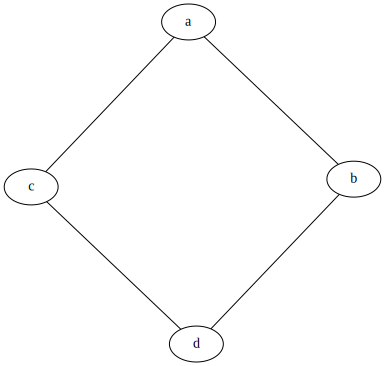

In [53]:
ladder2 = generate_ladder_graph(2)
display_graph(ladder2, 'sfdp')

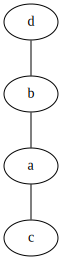

In [54]:
tree2 = find_spanning_tree(ladder2)
display_graph(tree2, 'twopi')

###3-Rung Ladder

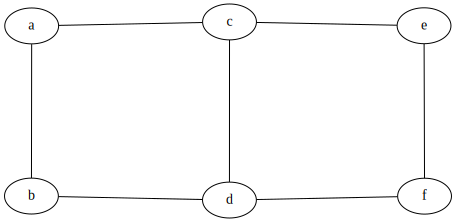

In [55]:
ladder3 = generate_ladder_graph(3)
display_graph(ladder3, 'sfdp')

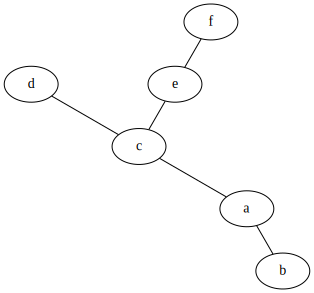

In [56]:
tree3 = find_spanning_tree(ladder3)
display_graph(tree3, 'twopi')

###4-Rung Ladder

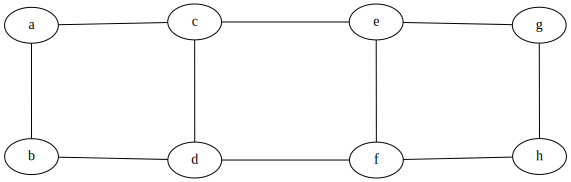

In [57]:
ladder4 = generate_ladder_graph(4)
display_graph(ladder4, 'sfdp')

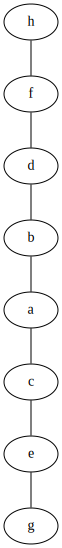

In [58]:
tree4 = find_spanning_tree(ladder4)
display_graph(tree4, 'twopi')

###5-Rung Ladder

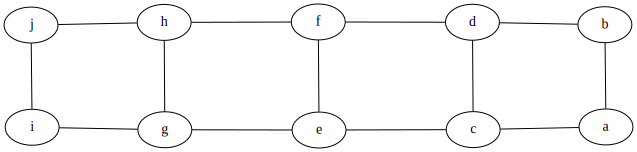

In [59]:
ladder5 = generate_ladder_graph(5)
display_graph(ladder5, 'sfdp')

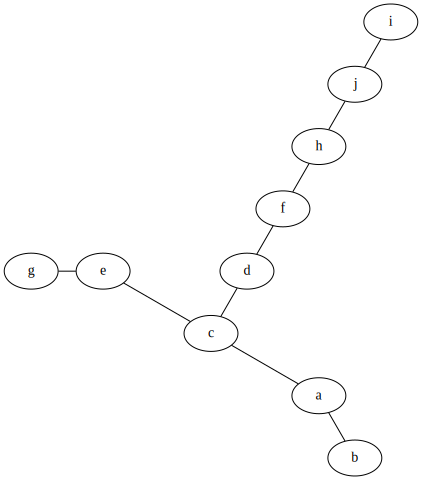

In [60]:
tree5 = find_spanning_tree(ladder5)
display_graph(tree5, 'twopi')

#Building the Graph Above

The code below creates the graph seen at the top of the document and a generated spanning tree

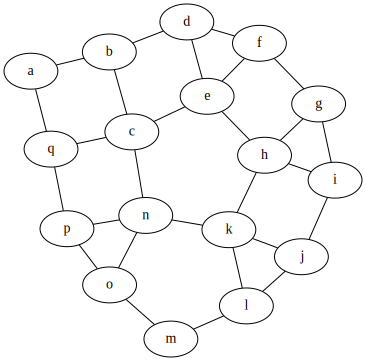

In [62]:
nodes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q']
links = [
  ('a', 'b'), ('a', 'q'), ('b', 'c'), ('b', 'd'), ('c', 'n'), ('c', 'q'), ('d', 'e'), ('d', 'f'), ('e', 'c'),
  ('e', 'h'), ('e', 'f'), ('f', 'g'), ('g', 'h'), ('g', 'i'), ('h', 'k'), ('h', 'i'), ('i', 'j'), ('j', 'k'),
  ('j', 'l'), ('k', 'l'), ('k', 'n'), ('l', 'm'), ('m', 'o'), ('n', 'o'), ('n', 'p'), ('p', 'o'), ('p', 'q')
]

neff_graph = Graph(nodes, links)
display_graph(neff_graph, 'neato')


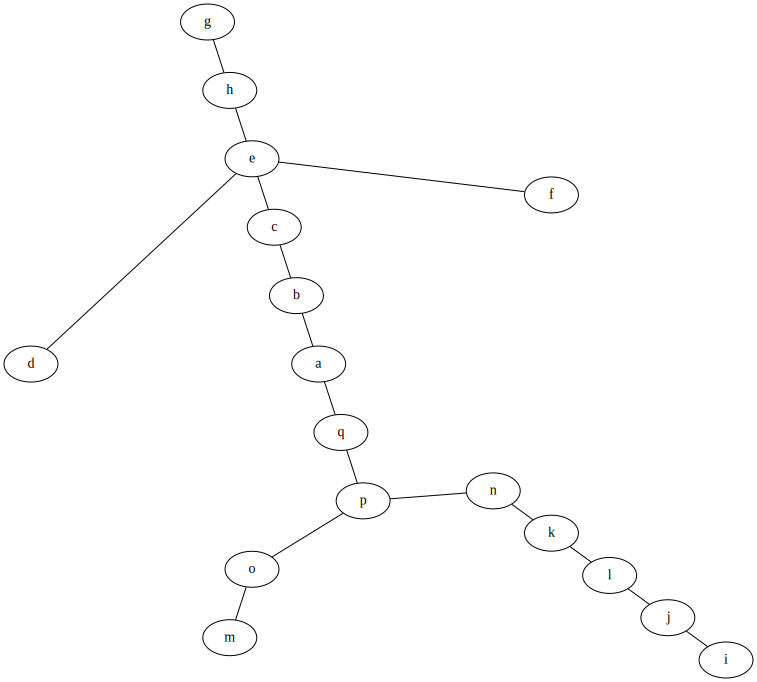

In [63]:
neff_tree = find_spanning_tree(neff_graph)
display_graph(neff_tree, 'twopi')

#Random Large Graphs

The code below creates a random graph of size n with at least 2n links

In [84]:
def generate_random_graph(n):
  nodes = [chr(i+97) for i in range(n)]
  links = []
  for node in nodes:
    for i in range(0, random.randint(2, 3)):
      j = random.randint(0, len(nodes)-1)
      if node != nodes[j]:
        links.append((node, nodes[j]))
  return Graph(nodes, links)


In [96]:
#Generate the three big graphs
big_1 = generate_random_graph(22)
big_tree_1 = find_spanning_tree(big_1)

big_2 = generate_random_graph(24)
big_tree_2 = find_spanning_tree(big_2)

big_3 = generate_random_graph(26)
big_tree_3 = find_spanning_tree(big_3)

Number of Links: 49


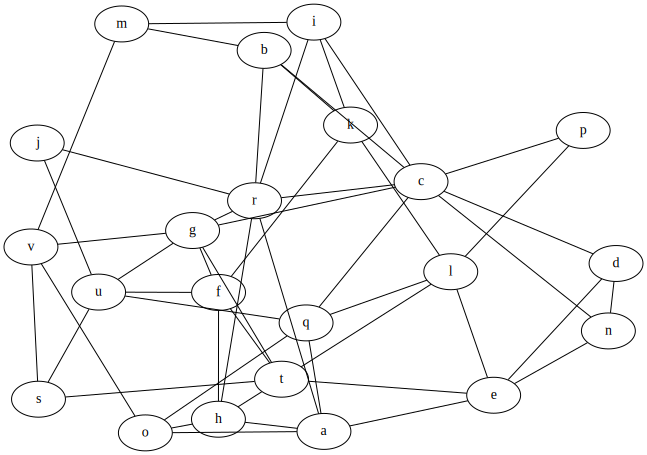

In [97]:
#Display number of links and the first big graph
print("Number of Links:",len(big_1.get_links()))
display_graph(big_1, 'sfdp')

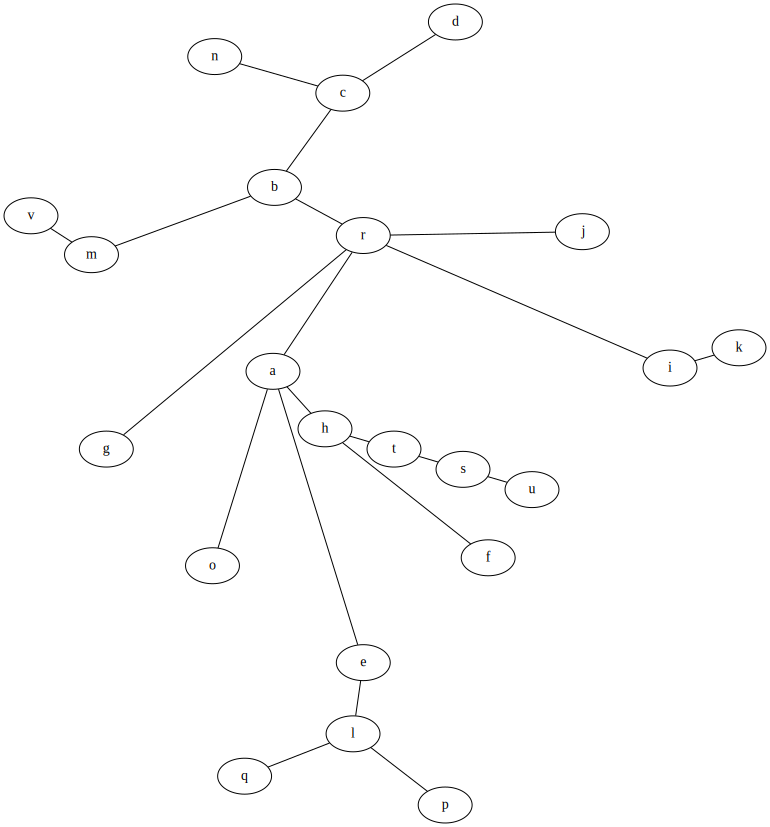

In [98]:
#display the first generated spanning tree
display_graph(big_tree_1, 'twopi')

Number of Links: 57


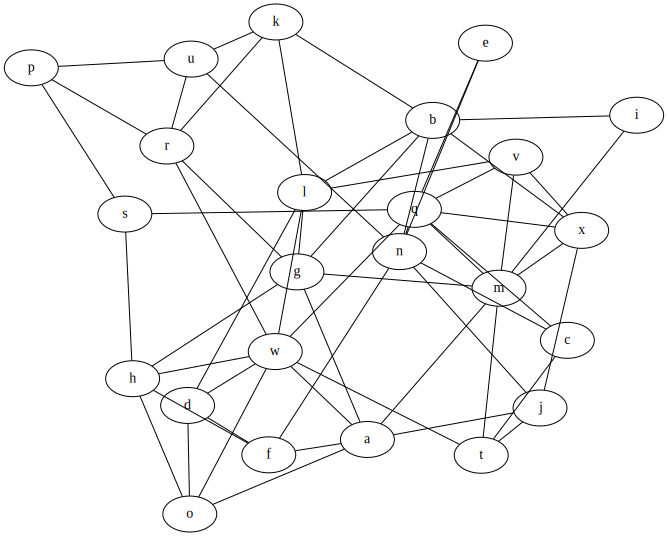

In [99]:
#Display number of links and the second big graph
print("Number of Links:",len(big_2.get_links()))
display_graph(big_2, 'sfdp')

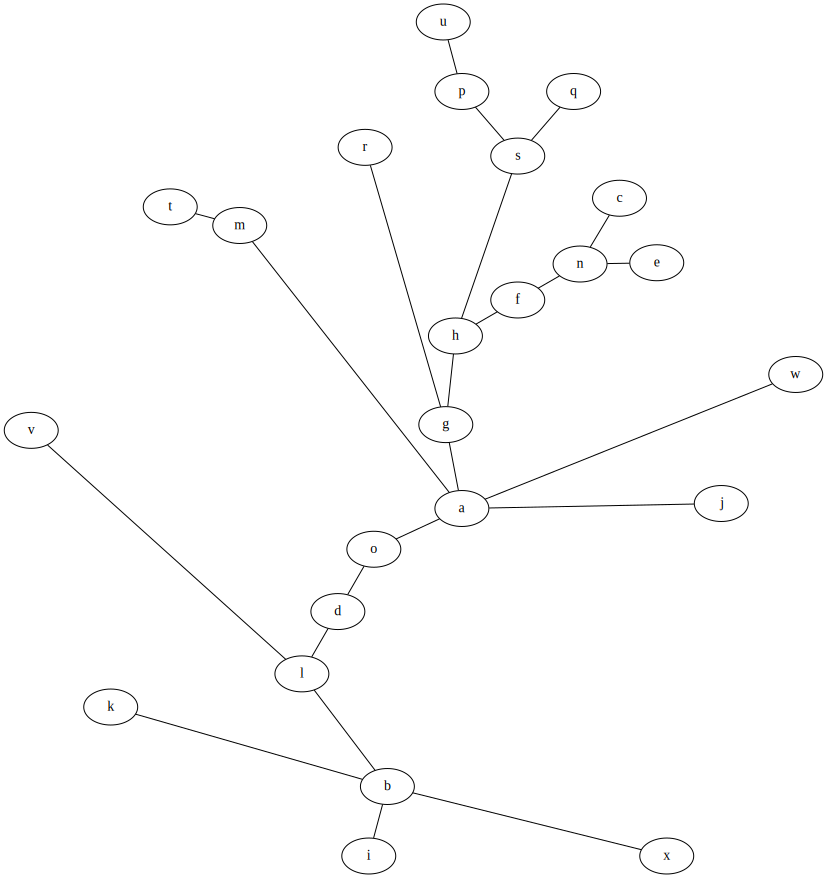

In [100]:
#display the second generated spanning tree
display_graph(big_tree_2, 'twopi')

Number of Links: 56


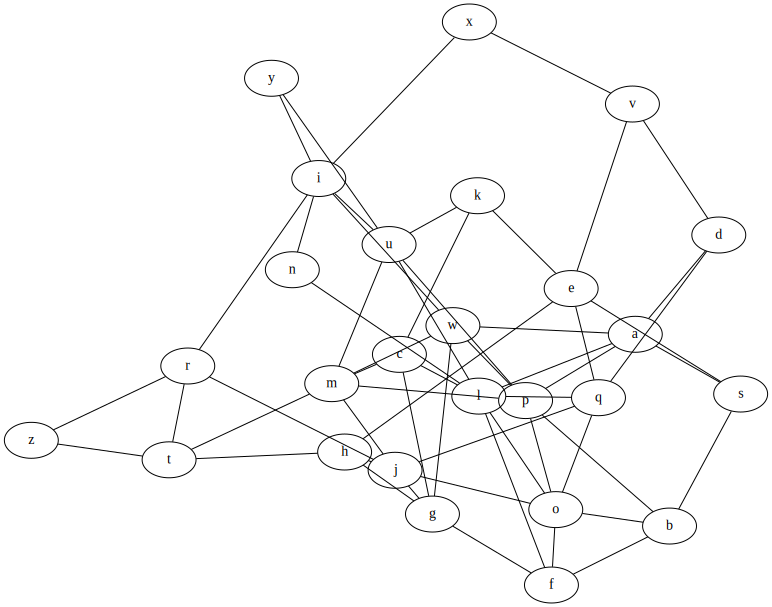

In [104]:
#Display number of links and the third big graph
print("Number of Links:",len(big_3.get_links()))
display_graph(big_3, 'sfdp')

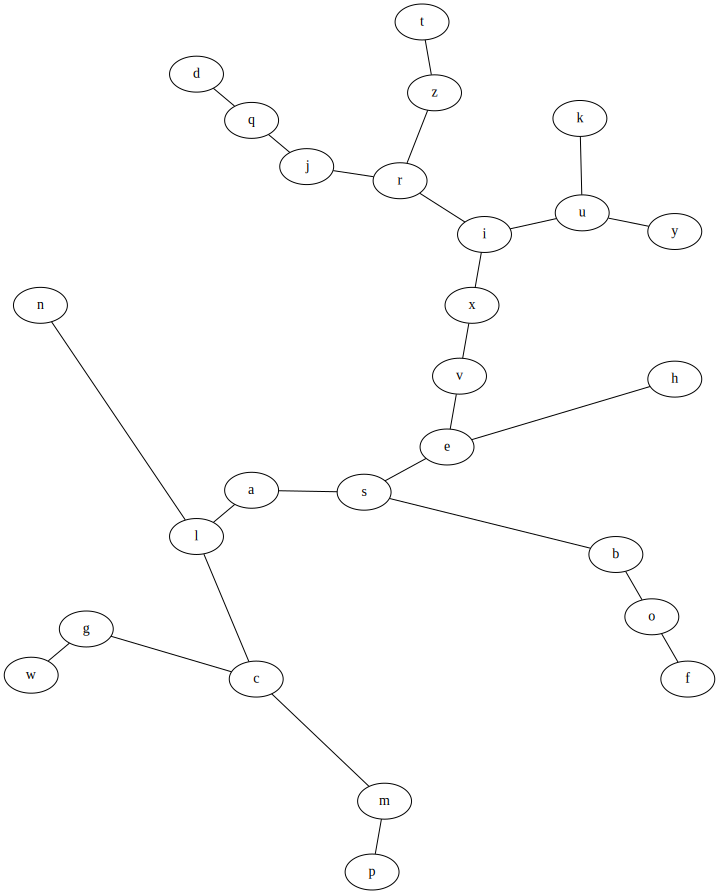

In [102]:
#display the third generated spanning tree
display_graph(big_tree_3, 'twopi')

# TODO My Report on What I Did and What I Learned

## Fun


This assignment was a lot of fun. Getting the algorithms to work correctly was a bit of a challenge, but when we could then visualize the graphs we were creating it was exciting to see what would be created next. The large randomly generated graphs were fun to build and then see turned into a spanning tree.

## New

I learned a lot about spanning trees. I don't remember using them before, so it was a good learning experience. It was cool to learn about how spanning trees can be elicited from graphs. I also learned how to create classes in python which was cool!

## Meaningful


Understanding differences in kinds of graphs is important, and learning how to create one type from another feels like an important skill to have. Data manipulation is an important skill and I think this will come in handy.

## Other

I got to work with Bretton Steiner, Claire Hocker, and Hannah Parker this week. Bretton was amazing and built a majority of the Graph class himself, along with Claire who created most of the GraphNode class. When those were made it took some debugging to work out kinks, but we were able to work together to make everything work seamlessly with Graphviz and our created functions.

# TODO What is True?
Click on each warranted checkbox to toggle it to True (or back to False). 

NOTE: *This only works in Colab. If you run it in some other Jupyter notebook client/server environment you may have to change False to True (or vice versa) manually.*

This self-assessment is subject to revision by a grader.

In [ ]:
#@markdown ## What is True about what I did?
#@markdown ### I had fun.
cb00 = True #@param {type:'boolean'}
#@markdown ### I learned something new.
cb01 = True #@param {type:'boolean'}
#@markdown ### I achieved something meaningful, or something I can build upon at a later time.
cb02 = True #@param {type:'boolean'}
#@markdown ## What is True about my report?
#@markdown ### I wrote a sufficient number of well-written sentences.
cb03 = True #@param {type:'boolean'}
#@markdown ### My report is free of mechanical infelicities.
cb04 = True #@param {type:'boolean'}
#@markdown ### I used Grammarly (or something better described in my report) to check for MIs.
cb05 = True #@param {type:'boolean'}
#@markdown ### I reported on any connections I found between these problems and something I already know. 
cb06 = True #@param {type:'boolean'}
#@markdown ### I reported who were and what contribution each of my collaborators made.
cb07 = True #@param {type:'boolean'}
#@markdown ## What is True about my code?
#@markdown ### I created code to represent a graph as (at a bare minimum) a set of nodes and a set of links.
cb08 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns a list of its nodes.
cb09 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns a list of its links.
cb10 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns an adjacency list of nodes and links.
cb11 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and a node and returns a list of adjacent nodes to that node.
cb12 = True #@param {type:'boolean'}
#@markdown ### I correctly implemented the spanning tree algorithm.
cb13 = True #@param {type:'boolean'}
#@markdown ## What is true about my testing?
#@markdown ### I created a ladder graph with 2 rungs and tested my code on it.
cb14 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 3 rungs and tested my code on it.
cb15 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 4 rungs and tested my code on it.
cb16 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 5 rungs and tested my code on it.
cb17 = True #@param {type:'boolean'}
#@markdown ### I created a graph from the example at the top of this notebook and tested my code on it.
cb18 = True #@param {type:'boolean'}
#@markdown ### I created three larger graphs (each with more than 20 nodes and more than 40 links) of my own devising and tested my code on it.
cb19 = True #@param {type:'boolean'}

## DO NOT CHANGE ANYTHING IN THE NEXT CODE CELL!!
### Delete this cell and the following ones before submitting your work.

In [ ]:
points_for_what_I_did = [5]*3
points_for_my_report = [8]*5
points_for_my_code = [5]*6
points_for_my_testing = [2]*4 + [3,4]
points = points_for_what_I_did + points_for_my_report + points_for_my_code + points_for_my_testing
# cb is short for checkbox
total = sum(map(lambda n, p: p if eval(f'cb{n:02}') else 0,
                range(len(points)), points))             
total

# For graders

In [ ]:
#@markdown ---
number_of_MIs_found = 0 #@param {type: 'slider', min: 0, max: 5}
#@markdown ---
